In [1]:
import pandas as pd
import datetime as dt
import time as t
import plotly.graph_objects as go
from plotly.offline import plot
from pycoingecko import CoinGeckoAPI

In [2]:
cg = CoinGeckoAPI()

#confirm connection
cg.ping()

{'gecko_says': '(V3) To the Moon!'}

In [3]:
#get a list of coins, sort df by id
coinList = cg.get_coins_list()
coinDataFrame = pd.DataFrame.from_dict(coinList).sort_values('id'
                                      ).reset_index(drop=True)
coinDataFrame

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0vix-protocol,vix,0VIX Protocol
3,0x,zrx,0x Protocol
4,0x0-ai-ai-smart-contract,0x0,0x0.ai: AI Smart Contract
...,...,...,...
10031,zynecoin,zyn,Zynecoin
10032,zynergy,zyn,Zynergy
10033,zyrri,zyr,Zyrri
10034,zyx,zyx,ZYX


In [4]:
#btc/eth/dpx by id
#coinDataFrame[coinDataFrame['id'] == 'bitcoin']
#coinDataFrame[coinDataFrame['id'] == 'ethereum']
#coinDataFrame[coinDataFrame['id'] == 'dopex']
coins = ['bitcoin','ethereum','dopex']
coins

['bitcoin', 'ethereum', 'dopex']

In [5]:
#get list of suppored VS currencies
counterCurrencies = cg.get_supported_vs_currencies()
vsCurrencies = ['usd', 'eur', 'link']
counterCurrencies


['btc',
 'eth',
 'ltc',
 'bch',
 'bnb',
 'eos',
 'xrp',
 'xlm',
 'link',
 'dot',
 'yfi',
 'usd',
 'aed',
 'ars',
 'aud',
 'bdt',
 'bhd',
 'bmd',
 'brl',
 'cad',
 'chf',
 'clp',
 'cny',
 'czk',
 'dkk',
 'eur',
 'gbp',
 'hkd',
 'huf',
 'idr',
 'ils',
 'inr',
 'jpy',
 'krw',
 'kwd',
 'lkr',
 'mmk',
 'mxn',
 'myr',
 'ngn',
 'nok',
 'nzd',
 'php',
 'pkr',
 'pln',
 'rub',
 'sar',
 'sek',
 'sgd',
 'thb',
 'try',
 'twd',
 'uah',
 'vef',
 'vnd',
 'zar',
 'xdr',
 'xag',
 'xau',
 'bits',
 'sats']

In [6]:
#most simple price request - nested dictionary format
simplePriceRequest = cg.get_price(ids = coins, vs_currencies = 'usd')
print(simplePriceRequest)

{'bitcoin': {'usd': 29382}, 'dopex': {'usd': 81.73}, 'ethereum': {'usd': 1846.42}}


In [7]:
complexPriceRequest = cg.get_price(ids = coins, 
                        vs_currencies = 'usd', 
                        include_market_cap = True,
                        include_24hr_vol = True,
                        include_24hr_change = True,
                        include_last_updated_at = True)
print(complexPriceRequest)

{'bitcoin': {'usd': 29382, 'usd_market_cap': 571127707137.3085, 'usd_24h_vol': 9328568805.364183, 'usd_24h_change': 0.03244312584698444, 'last_updated_at': 1691986647}, 'dopex': {'usd': 81.73, 'usd_market_cap': 21408169.58017127, 'usd_24h_vol': 412340.80168124323, 'usd_24h_change': -2.9162088324972806, 'last_updated_at': 1691986646}, 'ethereum': {'usd': 1846.42, 'usd_market_cap': 221695489822.91214, 'usd_24h_vol': 4735681312.49512, 'usd_24h_change': -0.09031935227002924, 'last_updated_at': 1691986645}}


In [8]:
#get all asset platforms
assetPlatformsList = cg.get_asset_platforms()
assetPlatforms = pd.DataFrame.from_dict(assetPlatformsList
                   ).sort_values('id').reset_index(drop=True)
assetPlatforms

,id,chain_identifier,name,shortname
0,,NaN,Radix,
1,,NaN,Matrix,
2,Bitcichain,NaN,Bitcichain,Bitcichain
3,ShibChain,NaN,ShibChain,
4,acala,NaN,Acala,
...,...,...,...,...
157,xdc-network,50.0,XDC Network,xdc xinfin
158,xrp,NaN,XRP Ledger,xrp
159,yocoin,NaN,Yocoin,yocoin
160,zilliqa,NaN,Zilliqa,


In [9]:

#assetPlatforms[assetPlatforms['id'] == 'binance-smart-chain']
#get AVAX token price (using contract address) from BSC (asset platform)
AVAXpriceBSC = cg.get_token_price(id = 'binance-smart-chain', 
                   contract_addresses = '0x1ce0c2827e2ef14d5c4f' +
                                        '29a091d735a204794041',
                   vs_currencies = 'usd')
AVAXpriceBSC

{'0x1ce0c2827e2ef14d5c4f29a091d735a204794041': {'usd': 12.26}}

In [10]:
coinCategoriesList = cg.get_coins_categories_list()

coinCategoriesList

[{'category_id': 'aave-tokens', 'name': 'Aave Tokens'},
 {'category_id': 'algorand-ecosystem', 'name': 'Algorand Ecosystem'},
 {'category_id': 'alleged-sec-securities', 'name': 'Alleged SEC Securities'},
 {'category_id': 'analytics', 'name': 'Analytics'},
 {'category_id': 'animal-racing', 'name': 'Animal Racing'},
 {'category_id': 'animoca-brands', 'name': 'Animoca Brands'},
 {'category_id': 'aptos-ecosystem', 'name': 'Aptos Ecosystem'},
 {'category_id': 'arbitrum-ecosystem', 'name': 'Arbitrum Ecosystem'},
 {'category_id': 'arbitrum-nova-ecosystem', 'name': 'Arbitrum Nova Ecosystem'},
 {'category_id': 'art', 'name': 'Art'},
 {'category_id': 'art-blocks-ecosystem', 'name': 'Art Blocks Ecosystem'},
 {'category_id': 'artificial-intelligence',
  'name': 'Artificial Intelligence (AI)'},
 {'category_id': 'asset-backed-tokens', 'name': 'Asset-backed Tokens'},
 {'category_id': 'asset-manager', 'name': 'Asset Manager'},
 {'category_id': 'augmented-reality', 'name': 'Augmented Reality'},
 {'cate

In [40]:
# 'payment-solutions', 'name': 'Payment Solutions'
# 'privacy-coins', 'name': 'Privacy Coins
#get coins categories, privacy-coins, stablecoins, gambling, lp-tokens, etc.
coinCategoriesData = pd.DataFrame(cg.get_coins_categories_list())
coinCategoriesData

,category_id,name
0,aave-tokens,Aave Tokens
1,algorand-ecosystem,Algorand Ecosystem
2,alleged-sec-securities,Alleged SEC Securities
3,analytics,Analytics
4,animal-racing,Animal Racing
...,...,...
202,yield-aggregator,Yield Aggregator
203,yield-farming,Yield Farming
204,zero-knowledge-zk,Zero Knowledge (ZK)
205,zilliqa-ecosystem,Zilliqa Ecosystem


In [41]:
#get data on coin categories
coinCategoriesData = pd.DataFrame(cg.get_coins_categories(
                                                order = 'market_cap_desc'))
coinCategoriesData

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,layer-1,Layer 1 (L1),8.820592e+11,-0.172387,,[https://assets.coingecko.com/coins/images/1/s...,1.261617e+10,2023-08-12T04:50:30.260Z
1,smart-contract-platform,Smart Contract Platform,3.421453e+11,-0.307864,Smart contract platforms are usually blockchai...,[https://assets.coingecko.com/coins/images/279...,6.724165e+09,2023-08-12T04:50:07.907Z
2,stablecoins,Stablecoins,1.252606e+11,-0.163289,,[https://assets.coingecko.com/coins/images/325...,1.095984e+10,2023-08-12T04:50:19.491Z
3,alleged-sec-securities,Alleged SEC Securities,9.192042e+10,-0.271395,Tokens and cryptocurrencies alleged to be secu...,[https://assets.coingecko.com/coins/images/825...,3.206801e+09,2023-08-12T04:50:04.569Z
4,exchange-based-tokens,Exchange-based Tokens,5.933895e+10,-0.505522,These tokens are normally associated with both...,[https://assets.coingecko.com/coins/images/825...,8.853350e+08,2023-08-12T04:50:17.995Z
...,...,...,...,...,...,...,...,...
110,aave-tokens,Aave Tokens,0.000000e+00,0.000000,None,[https://assets.coingecko.com/coins/images/116...,4.172518e+10,2023-08-12T04:50:18.599Z
111,linea-ecosystem,Linea Ecosystem,NaN,NaN,,[https://assets.coingecko.com/coins/images/297...,NaN,None
112,mantle-ecosystem,Mantle Ecosystem,NaN,NaN,,[https://assets.coingecko.com/coins/images/325...,NaN,None
113,base-ecosystem,Base Ecosystem,NaN,NaN,,[https://assets.coingecko.com/coins/images/116...,NaN,2023-07-31T06:41:01.295Z


In [42]:
#dictionary to dataframe
coinCategoriesDataFrame = pd.DataFrame.from_dict(coinCategoriesData
                                ).sort_values('id').reset_index(drop=True)
coinCategoriesDataFrame

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,aave-tokens,Aave Tokens,0.000000e+00,0.000000,None,[https://assets.coingecko.com/coins/images/116...,4.172518e+10,2023-08-12T04:50:18.599Z
1,algorand-ecosystem,Algorand Ecosystem,NaN,NaN,,[https://assets.coingecko.com/coins/images/438...,NaN,2023-03-17T09:10:40.985Z
2,alleged-sec-securities,Alleged SEC Securities,9.192042e+10,-0.271395,Tokens and cryptocurrencies alleged to be secu...,[https://assets.coingecko.com/coins/images/825...,3.206801e+09,2023-08-12T04:50:04.569Z
3,analytics,Analytics,1.130409e+09,-0.514719,These projects provide advanced insights and c...,[https://assets.coingecko.com/coins/images/133...,4.623177e+07,2023-08-12T04:50:08.774Z
4,animal-racing,Animal Racing,2.284856e+07,-2.916179,,[https://assets.coingecko.com/coins/images/174...,1.499825e+06,2023-08-12T04:50:03.356Z
...,...,...,...,...,...,...,...,...
110,yearn-yfi-partnerships-mergers,Yearn Ecosystem,4.311055e+08,0.241847,The Yearn Ecosystem is a suite of Decentralize...,[https://assets.coingecko.com/coins/images/118...,5.153877e+07,2023-08-12T04:50:25.273Z
111,yield-aggregator,Yield Aggregator,8.259639e+08,-0.241041,Yield aggregators are protocols that collate m...,[https://assets.coingecko.com/coins/images/155...,4.756759e+07,2023-08-12T04:50:24.940Z
112,yield-farming,Yield Farming,9.241056e+09,-0.426728,Yield farming is the act of staking or lending...,[https://assets.coingecko.com/coins/images/125...,4.021043e+08,2023-08-12T04:50:23.207Z
113,zero-knowledge-zk,Zero Knowledge (ZK),8.944543e+09,-0.274095,Zero-knowledge proof or Zero-knowledge protoco...,[https://assets.coingecko.com/coins/images/471...,5.637041e+08,2023-08-12T04:50:35.148Z


# IMPORTANTE

In [43]:
#get coins market cap, rank, prices, volume, market data, etc.
#by ID using a list
coinsMktDataByIds = cg.get_coins_markets(vs_currency = 'usd',
                                        ids = coins)
coinsMktDataByIds

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 29395,
  'market_cap': 571871233911,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 617296146665,
  'total_volume': 3601657130,
  'high_24h': 29509,
  'low_24h': 29303,
  'price_change_24h': 25.18,
  'price_change_percentage_24h': 0.08572,
  'market_cap_change_24h': 329612358,
  'market_cap_change_percentage_24h': 0.05767,
  'circulating_supply': 19454675.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -57.42659,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 43249.27435,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-08-12T04:57:01.608Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethereum.png?1595348880',
  '

In [44]:
#by category see cg.get_coins_categories_list(), in order
coinsMktDataByCategory = cg.get_coins_markets(vs_currency = 'usd',
                                    category = 'stablecoins',
                                    order = 'market_cap')
coinsMktDataByCategory

[{'id': 'tether',
  'symbol': 'usdt',
  'name': 'Tether',
  'image': 'https://assets.coingecko.com/coins/images/325/large/Tether.png?1668148663',
  'current_price': 0.99915,
  'market_cap': 83337059443,
  'market_cap_rank': 3,
  'fully_diluted_valuation': 83337059443,
  'total_volume': 14575561651,
  'high_24h': 1.001,
  'low_24h': 0.997579,
  'price_change_24h': 0.00064822,
  'price_change_percentage_24h': 0.06492,
  'market_cap_change_24h': -86931270.12071228,
  'market_cap_change_percentage_24h': -0.1042,
  'circulating_supply': 83410866925.6135,
  'total_supply': 83410866925.6135,
  'max_supply': None,
  'ath': 1.32,
  'ath_change_percentage': -24.48271,
  'ath_date': '2018-07-24T00:00:00.000Z',
  'atl': 0.572521,
  'atl_change_percentage': 74.52036,
  'atl_date': '2015-03-02T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-08-12T04:55:02.314Z'},
 {'id': 'usd-coin',
  'symbol': 'usdc',
  'name': 'USD Coin',
  'image': 'https://assets.coingecko.com/coins/images/6319/large/USD_

In [45]:
#by gecko rank, 250 per page, page number two 
coinsMktDataByPage = cg.get_coins_markets(vs_currency = 'usd',
                                      per_page = 250,
                                      page = 1,
                                      order = 'gecko_desc')
coinsMktDataByPage

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 29395,
  'market_cap': 571871233911,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 617296146665,
  'total_volume': 3601657130,
  'high_24h': 29509,
  'low_24h': 29303,
  'price_change_24h': 25.18,
  'price_change_percentage_24h': 0.08572,
  'market_cap_change_24h': 329612358,
  'market_cap_change_percentage_24h': 0.05767,
  'circulating_supply': 19454675.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -57.42659,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 43249.27435,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-08-12T04:57:01.608Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethereum.png?1595348880',
  '

In [46]:
#get coin data by ID, rate of change, sparkline chart data
coinsMktDataById = cg.get_coins_markets(vs_currency = 'usd',
                                      ids = 'bitcoin',
                                      price_change_percentage = '1h,24h,7d',
                                      sparkline = True)
#dictionary to dataframe
coinsMktDataFrame = pd.DataFrame.from_dict(coinsMktDataById).sort_values('id'
                                      ).reset_index(drop=True)
coinsMktDataFrame

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,sparkline_in_7d,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29395,571871233911,1,617296146665,3601657130,29509,...,2021-11-10T14:24:11.849Z,67.81,43249.27435,2013-07-06T00:00:00.000Z,None,2023-08-12T04:57:01.608Z,"{'price': [29080.301697276253, 29084.135769587...",0.081889,0.085716,1.179924


In [47]:
#get list of exchanges
exchgList = cg.get_exchanges_list(per_page = 250, page = 1)
exchgDataFrame = pd.DataFrame.from_dict(exchgList
                              ).sort_values('trade_volume_24h_btc_normalized',
                                            ascending = False
                              ).reset_index(drop=True)
exchgDataFrame

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,False,10.0,1.0,145460.003562,92359.952185
1,gdax,Coinbase Exchange,2012.0,United States,,https://coinbase-consumer.sjv.io/coingecko,https://assets.coingecko.com/markets/images/23...,False,10.0,2.0,21471.649406,21471.649406
2,digifinex,DigiFinex,2018.0,Seychelles,,https://www.digifinex.com/,https://assets.coingecko.com/markets/images/22...,False,8.0,14.0,19169.117615,19169.117615
3,lbank,LBank,2015.0,British Virgin Islands,LBank is a globally based centralized exchange...,https://www.lbank.com,https://assets.coingecko.com/markets/images/11...,False,7.0,40.0,16698.978540,16698.978540
4,coinw,CoinW,2017.0,United Arab Emirates,,https://www.coinw.com/,https://assets.coingecko.com/markets/images/11...,False,8.0,15.0,16375.131236,16375.131236
...,...,...,...,...,...,...,...,...,...,...,...,...
245,sinegy,SINEGY,2020.0,Malaysia,"Launched on 8th April 2020, SINEGY Marketplace...",https://marketplace.sinegy.com/,https://assets.coingecko.com/markets/images/61...,False,5.0,247.0,0.045246,0.045246
246,sushiswap_avalanche,Sushiswap (Avalanche),2021.0,None,,https://app.sushi.com/en/swap,https://assets.coingecko.com/markets/images/78...,False,5.0,248.0,0.037012,0.037012
247,blazeswap,Blazeswap (Songbird),NaN,None,,https://app.blazeswap.xyz/swap/,https://assets.coingecko.com/markets/images/11...,False,5.0,249.0,0.033749,0.033749
248,fairdesk,Fairdesk,NaN,Singapore,,https://www.fairdesk.com/,https://assets.coingecko.com/markets/images/10...,False,6.0,116.0,281.261676,0.000000


In [48]:
#get exchanges ids              
exchgIds = cg.get_exchanges_id_name_list()                             
exchgIdsDataFrame = pd.DataFrame.from_dict(exchgIds
                              ).sort_values('id'
                              ).reset_index(drop=True)
exchgIdsDataFrame

,id,name
0,1bch,1BCH
1,3xcalibur,3xcalibur
2,aave,Aave
3,abcc,ABCC
4,acala_swap,Acala Swap
...,...,...
806,zilswap,ZilSwap
807,zipmex,Zipmex
808,zipswap,ZipSwap
809,zircon,Zircon


In [49]:
#get exchange data by id // max of 100 results in exchgById['tickers']                                           
exchgById = cg.get_exchanges_by_id(id = 'binance')    
print(exchgById.keys())
exchgDataFrameById = pd.DataFrame(exchgById['tickers'])
print(exchgDataFrameById.columns)

KeyboardInterrupt: 

In [50]:
#the same as exchgById['tickers'] but can input multiple ids + pages
exchgTickersByID = cg.get_exchanges_tickers_by_id(id = 'binance', 
                                            coin_ids = ['bitcoin','ethereum'],
                                            page = 1, 
                                            depth = True, 
                                            order = 'volume_desc')
exchgTickersByID

{'name': 'Binance',
 'tickers': [{'base': 'BTC',
   'target': 'USDT',
   'market': {'name': 'Binance',
    'identifier': 'binance',
    'has_trading_incentive': False},
   'last': 29419.27,
   'volume': 19128.34535,
   'cost_to_move_up_usd': 15477569.5999769,
   'cost_to_move_down_usd': 12282794.2001451,
   'converted_last': {'btc': 0.999948, 'eth': 15.912038, 'usd': 29394},
   'converted_volume': {'btc': 19128, 'eth': 304379, 'usd': 562269110},
   'trust_score': None,
   'bid_ask_spread_percentage': 0.010034,
   'timestamp': '2023-08-12T04:58:01+00:00',
   'last_traded_at': '2023-08-12T04:58:01+00:00',
   'last_fetch_at': '2023-08-12T04:58:01+00:00',
   'is_anomaly': False,
   'is_stale': False,
   'trade_url': 'https://www.binance.com/en/trade/BTC_USDT?ref=37754157',
   'token_info_url': None,
   'coin_id': 'bitcoin',
   'target_coin_id': 'tether'},
  {'base': 'ETH',
   'target': 'USDT',
   'market': {'name': 'Binance',
    'identifier': 'binance',
    'has_trading_incentive': False}

In [51]:
#get exchg volume (in BTC?) // days param has a limit, returns 503 errors
exchgVolume = cg.get_exchanges_volume_chart_by_id(id='binance', days=90)

#list to dataframe
exchgVolumeDataFrame = pd.DataFrame(exchgVolume,  columns = ['Date', 'Volume'])

#reformat date
exchgVolumeDataFrame['Date'] = exchgVolumeDataFrame['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))
#reformat volume
exchgVolumeDataFrame['Volume'] = pd.to_numeric(exchgVolumeDataFrame['Volume'])

#set index
exchgVolumeDataFrame = exchgVolumeDataFrame.set_index('Date')
exchgVolumeDataFrame

,Volume
Date,
05-15-2023,183286.283141
05-16-2023,230836.548328
05-17-2023,218773.235789
05-18-2023,273901.937459
05-19-2023,267734.773061
...,...
08-08-2023,239024.548937
08-09-2023,274532.151416
08-10-2023,226691.213249


<Axes: xlabel='Date'>

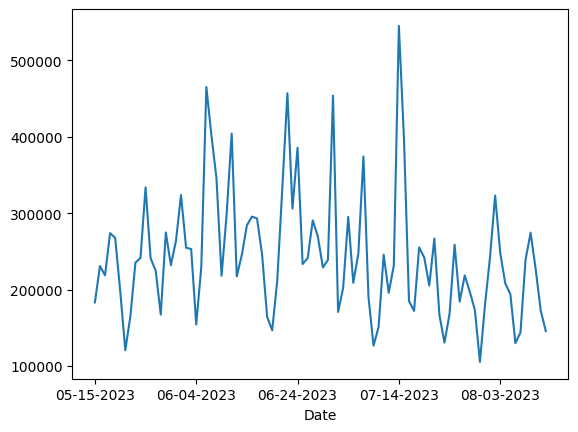

In [52]:
#plot
exchgVolumeDataFrame['Volume'].plot()

In [54]:
#get coin ticker by id / limited to 100, by page
mktSpecificData = cg.get_coin_ticker_by_id(id = 'bitcoin',
                                           exchange_id ='aave',
                                           page = 2,
                                           depth = True)
#dictionary to dataframe
mktSpecificDataFrame = pd.DataFrame.from_dict(mktSpecificData['tickers']
                                  ).sort_values('base').reset_index(drop=True)
mktSpecificDataFrame

,base,target,market,last,volume,cost_to_move_up_usd,cost_to_move_down_usd,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,ADA,BTC,"{'name': 'Binance', 'identifier': 'binance', '...",0.000010,2.246213e+06,224888.142241,305877.527840,"{'btc': 1.0, 'eth': 15.914488, 'usd': 29395}","{'btc': 22.494138, 'eth': 357.983, 'usd': 661206}",green,0.100301,2023-08-12T04:53:50+00:00,2023-08-12T04:53:50+00:00,2023-08-12T04:53:50+00:00,False,False,https://www.binance.com/en/trade/ADA_BTC?ref=3...,None,cardano,bitcoin
1,ADA,BTC,"{'name': 'WhiteBIT', 'identifier': 'whitebit',...",0.000010,4.247270e+05,189756.495594,212667.160268,"{'btc': 1.0, 'eth': 15.914832, 'usd': 29392}","{'btc': 4.234528, 'eth': 67.392, 'usd': 124460}",green,0.200401,2023-08-12T05:01:10+00:00,2023-08-12T05:01:10+00:00,2023-08-12T05:01:10+00:00,False,False,https://whitebit.com/trade/ADA_BTC,None,cardano,bitcoin
2,ARB,BTC,"{'name': 'Binance', 'identifier': 'binance', '...",0.000039,1.025371e+06,113184.306576,195510.261733,"{'btc': 1.0, 'eth': 15.914481, 'usd': 29395}","{'btc': 40.374545, 'eth': 642.54, 'usd': 1186825}",green,0.050839,2023-08-12T04:56:09+00:00,2023-08-12T04:56:09+00:00,2023-08-12T04:56:09+00:00,False,False,https://www.binance.com/en/trade/ARB_BTC?ref=3...,None,arbitrum,bitcoin
3,ATOM,BTC,"{'name': 'BitMart', 'identifier': 'bitmart', '...",0.000284,9.407520e+03,364736.654821,321874.915468,"{'btc': 1.0, 'eth': 15.913088, 'usd': 29391}","{'btc': 2.67484, 'eth': 42.564967, 'usd': 78617}",green,0.021091,2023-08-12T05:02:07+00:00,2023-08-12T05:02:07+00:00,2023-08-12T05:02:07+00:00,False,False,https://www.bitmart.com/trade/en?layout=basic&...,None,cosmos,bitcoin
4,ATOM,BTC,"{'name': 'Bitget', 'identifier': 'bitget', 'ha...",0.000284,4.834239e+04,293246.375667,414271.257544,"{'btc': 1.0, 'eth': 15.913088, 'usd': 29391}","{'btc': 13.7597, 'eth': 218.959, 'usd': 404416}",green,0.175562,2023-08-12T05:02:11+00:00,2023-08-12T05:02:11+00:00,2023-08-12T05:02:11+00:00,False,False,https://www.bitget.com/spot/ATOMBTC?type=spot,None,cosmos,bitcoin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,XMR,BTC,"{'name': 'KuCoin', 'identifier': 'kucoin', 'ha...",0.005355,1.436828e+04,145040.227154,193292.134868,"{'btc': 1.0, 'eth': 15.916242, 'usd': 29394}","{'btc': 76.942, 'eth': 1225, 'usd': 2261646}",green,0.055960,2023-08-12T05:00:31+00:00,2023-08-12T05:00:31+00:00,2023-08-12T05:00:31+00:00,False,False,https://www.kucoin.com/trade/XMR-BTC,None,monero,bitcoin
96,XRP,BTC,"{'name': 'Dex-Trade', 'identifier': 'dextrade'...",0.000021,4.368265e+05,189149.687608,184558.145776,"{'btc': 1.0, 'eth': 15.914832, 'usd': 29392}","{'btc': 9.348086, 'eth': 148.773, 'usd': 274755}",green,0.280112,2023-08-12T05:01:03+00:00,2023-08-12T05:01:03+00:00,2023-08-12T05:01:03+00:00,False,False,None,None,ripple,bitcoin
97,XRP,BTC,"{'name': 'Coinsbit', 'identifier': 'coinsbit',...",0.000021,9.821945e+05,385925.495974,283090.967187,"{'btc': 1.0, 'eth': 15.91285, 'usd': 29391}","{'btc': 20.999317, 'eth': 334.159, 'usd': 617198}",green,0.046751,2023-08-12T05:00:48+00:00,2023-08-12T05:00:48+00:00,2023-08-12T05:03:21+00:00,False,False,https://coinsbit.io/trade/XRP_BTC,None,ripple,bitcoin
98,XRP,BTC,"{'name': 'EXMO', 'identifier': 'exmo', 'has_tr...",0.000021,3.813076e+06,276046.486320,248580.323633,"{'btc': 1.0, 'eth': 15.913088, 'usd': 29391}","{'btc': 81.524, 'eth': 1297, 'usd': 2396084}",green,0.186916,2023-08-12T05:02:35+00:00,2023-08-12T05:02:35+00:00,2023-08-12T05:02:35+00:00,False,False,https://exmo.com/en/trade/XRP_BTC,None,ripple,bitcoin


In [55]:
#get coin history by SINGLE id
coinHistory = cg.get_coin_history_by_id(id = 'bitcoin', 
                              date = dt.datetime.today().strftime('%d-%m-%Y'))
coinHistory

{'id': 'bitcoin',
 'symbol': 'btc',
 'name': 'Bitcoin',
 'localization': {'en': 'Bitcoin',
  'de': 'Bitcoin',
  'es': 'Bitcoin',
  'fr': 'Bitcoin',
  'it': 'Bitcoin',
  'pl': 'Bitcoin',
  'ro': 'Bitcoin',
  'hu': 'Bitcoin',
  'nl': 'Bitcoin',
  'pt': 'Bitcoin',
  'sv': 'Bitcoin',
  'vi': 'Bitcoin',
  'tr': 'Bitcoin',
  'ru': 'Биткоин',
  'ja': 'ビットコイン',
  'zh': '比特币',
  'zh-tw': '比特幣',
  'ko': '비트코인',
  'ar': 'بيتكوين',
  'th': 'บิตคอยน์',
  'id': 'Bitcoin',
  'cs': 'Bitcoin',
  'da': 'Bitcoin',
  'el': 'Bitcoin',
  'hi': 'Bitcoin',
  'no': 'Bitcoin',
  'sk': 'Bitcoin',
  'uk': 'Bitcoin',
  'he': 'Bitcoin',
  'fi': 'Bitcoin',
  'bg': 'Bitcoin',
  'hr': 'Bitcoin',
  'lt': 'Bitcoin',
  'sl': 'Bitcoin'},
 'image': {'thumb': 'https://assets.coingecko.com/coins/images/1/thumb/bitcoin.png?1547033579',
  'small': 'https://assets.coingecko.com/coins/images/1/small/bitcoin.png?1547033579'},
 'market_data': {'current_price': {'aed': 107975.79847294655,
   'ars': 8434622.021353502,
   'aud': 4521

---
# IMPORTANTE

In [56]:
#get daily historical data
dailyHistoricalData = cg.get_coin_market_chart_by_id(id = 'bitcoin', 
                               vs_currency = 'usd',
                               days = 'max')
dailyHistoricalData

{'prices': [[1367107200000, 135.3],
  [1367193600000, 141.96],
  [1367280000000, 135.3],
  [1367366400000, 117.0],
  [1367452800000, 103.43],
  [1367539200000, 91.01],
  [1367625600000, 111.25],
  [1367712000000, 116.79],
  [1367798400000, 118.33],
  [1367884800000, 106.4],
  [1367971200000, 112.64],
  [1368057600000, 113.0],
  [1368144000000, 118.78],
  [1368230400000, 113.01],
  [1368316800000, 114.713],
  [1368403200000, 117.18],
  [1368489600000, 114.5],
  [1368576000000, 114.156],
  [1368662400000, 115.5],
  [1368748800000, 123.1],
  [1368835200000, 123.88],
  [1368921600000, 120.501],
  [1369008000000, 122.58],
  [1369094400000, 122.9],
  [1369180800000, 123.0],
  [1369267200000, 125.748],
  [1369353600000, 131.7],
  [1369440000000, 130.77],
  [1369526400000, 134.6],
  [1369612800000, 128.985],
  [1369699200000, 129.179],
  [1369785600000, 132.13],
  [1369872000000, 127.401],
  [1369958400000, 127.98],
  [1370044800000, 129.09],
  [1370131200000, 121.3],
  [1370217600000, 121.16]

In [57]:
#get hourly historical data
hourlyHistoricalData = cg.get_coin_market_chart_by_id(id = 'bitcoin', 
                               vs_currency = 'usd',
                               days = 90)

#get 5 minute historical data
fiveMinHistoricalData = cg.get_coin_market_chart_by_id(id = 'bitcoin', 
                               vs_currency = 'usd',
                               days = 1)


In [58]:
#input a range of timestamps to get data for - using predetermined frequency
chartRange = cg.get_coin_market_chart_range_by_id(id = 'bitcoin', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1392577232, 
                                                  to_timestamp = 1422577232)


---
# IMPORTANTE

In [59]:
#list of lists to dataframe 
dailyHistoricalDataFrame = pd.DataFrame(data = dailyHistoricalData['prices'],
                                        columns = ['Date', 'Price'])
dailyHistoricalDataFrame

,Date,Price
0,1367107200000,135.300000
1,1367193600000,141.960000
2,1367280000000,135.300000
3,1367366400000,117.000000
4,1367452800000,103.430000
...,...,...
3752,1691452800000,29178.147752
3753,1691539200000,29779.561671
3754,1691625600000,29585.488077
3755,1691712000000,29423.818916


<Axes: xlabel='Date'>

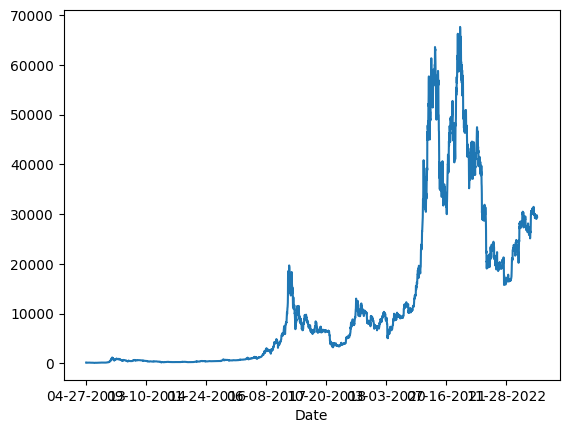

In [60]:
#reformat date
dailyHistoricalDataFrame['Date'] = dailyHistoricalDataFrame['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))
#set index
dailyHistoricalDataFrame = dailyHistoricalDataFrame.set_index('Date')

#plot
dailyHistoricalDataFrame['Price'].plot()

---
# IMPORTANTE

In [63]:
#get OHLC data for preset range 1/7/14/30/90/180/365/max
#candle body width by date range 
#1 - 2 days: 30 minutes
#3 - 30 days: 4 hours
#31 days and beyond: 4 days
ohlcData = cg.get_coin_ohlc_by_id(id = 'bitcoin', 
                                  vs_currency = 'usd', 
                                  days = '14')
#list to dataframe
ohlcDataFrame = pd.DataFrame(data = ohlcData,
                           columns = ['Date', 'Open', 'High' ,'Low', 'Close'])
#reformat date
ohlcDataFrame['Date'] = ohlcDataFrame['Date'].apply(
                        lambda x: dt.datetime.fromtimestamp(x/1000
                        ).strftime('%m-%d-%Y %H:%M:%S'))
#set index
ohlcDataFrame = ohlcDataFrame.set_index('Date')

#generate plotly figure
fig = go.Figure(data=[go.Candlestick(x=ohlcDataFrame.index,
                open=ohlcDataFrame['Open'],
                high=ohlcDataFrame['High'],
                low=ohlcDataFrame['Low'],
                close=ohlcDataFrame['Close'])])

#open figure in browser
plot(fig, auto_open=True)

'temp-plot.html'

In [64]:
#get coin info from contract address
coinInfoByAddress = cg.get_coin_info_from_contract_address_by_id(
                               id = 'binance-smart-chain', 
                               contract_address = '0x1ce0c2827e2ef14d5c4f' +
                                                  '29a091d735a204794041')
#display
print(coinInfoByAddress['market_data'].keys())
print(coinInfoByAddress['tickers'])

dict_keys(['current_price', 'total_value_locked', 'mcap_to_tvl_ratio', 'fdv_to_tvl_ratio', 'roi', 'ath', 'ath_change_percentage', 'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'market_cap', 'market_cap_rank', 'fully_diluted_valuation', 'total_volume', 'high_24h', 'low_24h', 'price_change_24h', 'price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y', 'market_cap_change_24h', 'market_cap_change_percentage_24h', 'price_change_24h_in_currency', 'price_change_percentage_1h_in_currency', 'price_change_percentage_24h_in_currency', 'price_change_percentage_7d_in_currency', 'price_change_percentage_14d_in_currency', 'price_change_percentage_30d_in_currency', 'price_change_percentage_60d_in_currency', 'price_change_percentage_200d_in_currency', 'price_change_percentage_1y_in_currency', 'market_cap_change_24h_in_currency', 'market

In [65]:
#get historical market data - price, mkt cap, and volume / days = 1 to 'max'
#similar data points to .get_coin_market_chart_by_id()
coinChartData = cg.get_coin_market_chart_from_contract_address_by_id(
                            id = 'binance-smart-chain', 
                            contract_address = '0x1ce0c2827e2ef14d5c4f' +
                                               '29a091d735a204794041',
                            vs_currency = 'usd',
                            days = 'max')
coinChartData

{'prices': [[1632873600000, 66.36506284331885],
  [1632960000000, 66.36506284331885],
  [1633046400000, 64.05545484234499],
  [1633132800000, 68.66789148535095],
  [1633219200000, 72.16495457553856],
  [1633305600000, 68.84708498124893],
  [1633392000000, 66.05863322710985],
  [1633478400000, 65.52678410204712],
  [1633564800000, 61.83697318790886],
  [1633651200000, 60.597077528708],
  [1633737600000, 61.05557542871747],
  [1633824000000, 61.4288479193814],
  [1633910400000, 56.96188596088267],
  [1633996800000, 54.56667244085283],
  [1634083200000, 54.87260465206285],
  [1634169600000, 55.72291134465807],
  [1634256000000, 58.09804893457844],
  [1634342400000, 56.10741965288734],
  [1634428800000, 58.57203011371626],
  [1634515200000, 57.38791310833963],
  [1634601600000, 55.18702179184469],
  [1634688000000, 56.849630320598486],
  [1634774400000, 60.004423095919854],
  [1634860800000, 61.24904953052261],
  [1634947200000, 64.75881219127751],
  [1635033600000, 66.58481456497073],
  [

In [67]:
coinChartDataRng = cg.get_coin_market_chart_range_from_contract_address_by_id(
                            id = 'binance-smart-chain', 
                            contract_address = '0x1ce0c2827e2ef14d5c4f' +
                                               '29a091d735a204794041',
                            vs_currency = 'usd',
                            from_timestamp = t.time()-100000, 
                            to_timestamp = t.time())
coinChartDataRng

{'prices': [[1691717483772, 12.534713948040023],
  [1691717734470, 12.525805697399235],
  [1691718052305, 12.525617071306517],
  [1691718380225, 12.512292412488353],
  [1691718623832, 12.526283442797919],
  [1691718925682, 12.505273376016358],
  [1691719281366, 12.50371034148991],
  [1691719516192, 12.530544223628137],
  [1691719811931, 12.504041819008643],
  [1691720131065, 12.51602650747298],
  [1691720417824, 12.50523195117488],
  [1691720717499, 12.502915714605523],
  [1691721068132, 12.502655627852505],
  [1691721375143, 12.503957331018471],
  [1691721678810, 12.516888697103491],
  [1691721978525, 12.508047610652591],
  [1691722287243, 12.511985418070749],
  [1691722534885, 12.508622168630138],
  [1691722897189, 12.495873871951185],
  [1691723166919, 12.507363872915933],
  [1691723485989, 12.43915159620768],
  [1691723785987, 12.440428511797862],
  [1691724007774, 12.437779113816894],
  [1691724312745, 12.43601976796368],
  [1691724621923, 12.448435418954434],
  [1691724907945, 12

In [68]:
#display
print(coinChartData.keys())

dict_keys(['prices', 'market_caps', 'total_volumes'])


<Axes: xlabel='Date'>

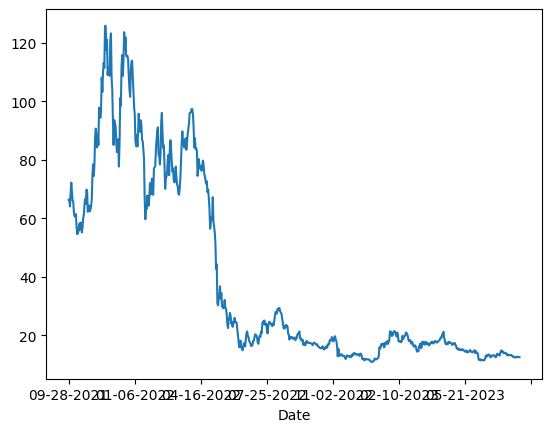

In [69]:
#list of lists to dataframe 
coinChartDataFrame = pd.DataFrame(data = coinChartData['prices'],
                                        columns = ['Date', 'Price'])

#reformat date
coinChartDataFrame['Date'] = coinChartDataFrame['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))
#set index
coinChartDataFrame = coinChartDataFrame.set_index('Date')

#plot
coinChartDataFrame['Price'].plot()

In [70]:
#get limited index data // name, id , market, last price
indexData = cg.get_indexes()

indexData

[{'name': 'ZB (Derivatives) PEOPLE',
  'id': 'PEOPLE',
  'market': 'ZB (Derivatives)',
  'last': 0.02973,
  'is_multi_asset_composite': False},
 {'name': 'CME Group BTC',
  'id': 'BTC',
  'market': 'CME Group',
  'last': 0.02973,
  'is_multi_asset_composite': False},
 {'name': 'EOSPFC',
  'id': 'EOSPFC',
  'market': 'BTSE (Futures)',
  'last': 1.2166563415,
  'is_multi_asset_composite': False},
 {'name': 'Bibox (Futures) LUNC',
  'id': 'LUNC',
  'market': 'Bibox (Futures)',
  'last': 1.2166563415,
  'is_multi_asset_composite': False},
 {'name': 'ZB (Derivatives) FIL',
  'id': 'FIL',
  'market': 'ZB (Derivatives)',
  'last': 8.39,
  'is_multi_asset_composite': False},
 {'name': 'Bibox (Futures) LUNA',
  'id': 'LUNA',
  'market': 'Bibox (Futures)',
  'last': 8.39,
  'is_multi_asset_composite': False},
 {'name': 'Bibox (Futures) APT',
  'id': 'APT',
  'market': 'Bibox (Futures)',
  'last': 8.39,
  'is_multi_asset_composite': False},
 {'name': 'BingX (Futures) CEL',
  'id': 'CEL',
  'marke

In [71]:
#get index ids, names
indexIds = cg.get_indexes_list()
indexIdsDataFrame = pd.DataFrame(indexIds).sort_values('id'
                                                       ).reset_index(drop=True)
indexIdsDataFrame

,id,name
0,0XD69731A2E74AC1CE884FC3890F7EE324B6DEB6614705...,Helix (Futures) 0XD69731A2E74AC1CE884FC3890F7E...
1,10000BAB,Deepcoin (Derivatives) 10000BAB
2,10000NFT,Bybit (Futures) 10000NFT
3,1000BTT,Bybit (Futures) 1000BTT
4,1000FLOKI,Binance (Futures) 1000FLOKI
...,...,...
5238,"{""VALUE""=>""DOT""}","MCS {""VALUE""=>""DOT""}"
5239,"{""VALUE""=>""LINK""}","MCS {""VALUE""=>""LINK""}"
5240,"{""VALUE""=>""LTC""}","MCS {""VALUE""=>""LTC""}"
5241,"{""VALUE""=>""MATIC""}","MCS {""VALUE""=>""MATIC""}"


In [72]:
#get all derivatives tickers
derivTickers = cg.get_derivatives()

#list to dataframe
derivTickersDataFrame = pd.DataFrame(derivTickers).sort_values('symbol'
                                                ).reset_index(drop=True)
derivTickersDataFrame

,market,symbol,index_id,price,price_percentage_change_24h,contract_type,index,basis,spread,funding_rate,open_interest,volume_24h,last_traded_at,expired_at
0,MEXC (Futures),1000000FLOKICEO_USDT,1000000FLOKICEO,0.0,-0.370370,perpetual,5.360000e-06,-0.371747,0.19,-0.010000,NaN,3.327014e+04,1691817287,NaN
1,MEXC (Futures),1000000OGGY_USDT,1000000OGGY,0.0,-0.429185,perpetual,2.320000e-05,0.000000,1.28,0.010000,NaN,1.349876e+05,1691817287,NaN
2,MEXC (Futures),1000000SIMPSON_USDT,1000000SIMPSON,0.0,-11.518325,perpetual,1.680000e-06,-0.591716,0.59,0.000000,NaN,3.566426e+05,1691817287,NaN
3,MEXC (Futures),100000AIDOGE_USDT,100000AIDOGE,0.0,1.160093,perpetual,8.790000e-06,0.802752,0.11,-0.185500,NaN,9.325228e+04,1691817287,NaN
4,MEXC (Futures),100000BABYDOGE2_USDT,100000BABYDOGE2,0.0,0.000000,perpetual,3.590000e-07,-1.643836,0.27,-0.010000,NaN,2.233139e+05,1691817287,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,Bitget Futures,ZRXUSDT_UMCBL,ZRX,0.21,-0.329412,perpetual,2.120832e-01,0.133692,0.05,0.009400,NaN,3.287805e+05,1691817287,NaN
4637,XT.COM (Derivatives),ZRX_USDT,ZRX,0.21,-0.235405,perpetual,2.120000e-01,0.047192,NaN,0.135553,NaN,1.043718e+06,1691817268,NaN
4638,Gate.io (Futures),ZRX_USDT,ZRX,0.21,0.141576,perpetual,2.121450e-01,-0.025919,33.33,0.010000,88151.39,1.666003e+04,1691815737,NaN
4639,MEXC (Futures),ZRX_USDT,ZRX,0.21,-0.282353,perpetual,2.121000e-01,0.094384,0.05,0.010000,96630.85,1.122132e+05,1691817285,NaN


In [73]:
#get derivatives exchanges + data
derivExchg = cg.get_derivatives_exchanges()       
#list to dataframe        
derivExchgDataFrame = pd.DataFrame(derivExchg).sort_values('id'
                                                ).reset_index(drop=True)
derivExchgDataFrame

,name,id,open_interest_btc,trade_volume_24h_btc,number_of_perpetual_pairs,number_of_futures_pairs,image,year_established,country,description,url
0,Bibox (Futures),bibox_futures,NaN,186.3,27,0,https://assets.coingecko.com/markets/images/49...,2019.0,China,,https://www.bibox.com/
1,BigONE Futures,bigone_futures,124.72,4224.96,8,0,https://assets.coingecko.com/markets/images/58...,NaN,None,,https://big.one/
2,Binance (Futures),binance_futures,320626.77,606218.01,254,20,https://assets.coingecko.com/markets/images/46...,2019.0,None,,https://www.binance.com/
3,BingX (Futures),bingx_futures,57990.39,86401.68,159,0,https://assets.coingecko.com/markets/images/91...,NaN,None,"Founded in 2018, BingX is a crypto social trad...",https://bingx.com/
4,BIT (Futures),bit_com_futures,0.08,4120.79,47,0,https://assets.coingecko.com/markets/images/60...,2020.0,Seychelles,Bit.com is a centralized cryptocurrency exchan...,https://www.bit.com
5,Bitfinex (Futures),bitfinex_futures,18277.85,1213.79,89,0,https://assets.coingecko.com/markets/images/48...,2019.0,British Virgin Islands,,https://www.bitfinex.com/
6,Bitflyer (Futures),bitflyer_futures,NaN,535.94,1,3,https://assets.coingecko.com/markets/images/43...,2014.0,Japan,,https://lightning.bitflyer.com/
7,Bitforex (Futures),bitforex_futures,3875.31,54291.46,13,0,https://assets.coingecko.com/markets/images/45...,2018.0,Seychelles,,https://www.bitforex.com/en/perpetual/btc_usd
8,Bitget Futures,bitget_futures,126057.05,149059.39,215,0,https://assets.coingecko.com/markets/images/59...,NaN,None,,https://www.bitget.com/en/
9,Bitmart Futures,bitmart_futures,17683.46,64944.37,116,0,https://assets.coingecko.com/markets/images/52...,1996.0,None,,https://futures.bitmart.com/


In [ ]:

#get exchanges ordered by open interest
print(derivExchgDataFrame.sort_values('open_interest_btc',
                                       ascending = False
                                       ).reset_index(drop=True
                                       )[['id','open_interest_btc']].dropna())

#get exchange ids
derivExchgId = cg.get_derivatives_exchanges_list()

#list to dataframe
derivExchgIdDataFrame = pd.DataFrame(derivExchgId).sort_values('id'
                                                 ).reset_index(drop=True)
#display
print(derivExchgIdDataFrame['id'].head(20))

#get single exchange data by id + ticker data
print(cg.get_derivatives_exchanges_by_id(id = 'binance_futures'))
#with tickers
singleExchgData = cg.get_derivatives_exchanges_by_id(id = 'binance_futures',
                                                     include_tickers = 'all')
#ticker data list to dataframe
singleExchgTickerData = pd.DataFrame(singleExchgData['tickers']
                                     ).sort_values('symbol'
                                     ).reset_index(drop=True)

#get exchange rates
exchangeRates = cg.get_exchange_rates()
#list to dataframe
exchangeRatesDataFrame = pd.DataFrame(exchangeRates['rates'])

#get trending search coins 
trendingCoins = cg.get_search_trending()['coins']


#get global cryptcurrency data // not too useful
globalData = cg.get_global()
print(globalData.keys())


#get global defi data 
globalDefiData = cg.get_global_decentralized_finance_defi()

#get public companies bitcoin or ethereum holdings
publicBTC = cg.get_companies_public_treasury_by_coin_id(coin_id = 'bitcoin')
publicETH = cg.get_companies_public_treasury_by_coin_id(coin_id = 'ethereum')
